# Linear model POD with censored data

In [1]:
# import relevant module
import openturns as ot
import otpod
# enable display figure in notebook
try:
    %matplotlib inline
except:
    pass

/calcul/home/dumas/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Generate data

In [2]:
N = 100
ot.RandomGenerator.SetSeed(123456)
defectDist = ot.Uniform(0.1, 0.6)
# normal epsilon distribution
epsilon = ot.Normal(0, 1.9)
defects = defectDist.getSample(N)
signalsInvBoxCox = defects * 43. + epsilon.getSample(N) + 2.5
# Inverse Box Cox transformation
invBoxCox = ot.InverseBoxCoxTransform(0.3)
signals = invBoxCox(signalsInvBoxCox)

## Build POD using previous linear analysis

In [3]:
noiseThres = 60.
saturationThres = 1700.

# run the analysis with Gaussian hypothesis of the residuals (default case)
analysis = otpod.UnivariateLinearModelAnalysis(defects, signals, noiseThres,
                                               saturationThres, boxCox=True)

In [4]:
# signal detection threshold
detection = 200.
# Use the analysis to build the POD with Gaussian hypothesis
# keyword arguments must be given
PODGauss = otpod.UnivariateLinearModelPOD(analysis=analysis, detection=detection)
PODGauss.run()

## Build POD with Gaussian hypothesis

In [5]:
# The previous POD is equivalent to the following POD
PODGauss = otpod.UnivariateLinearModelPOD(defects, signals, detection,
                                          noiseThres, saturationThres,
                                          resDistFact=ot.NormalFactory(),
                                          boxCox=True)
PODGauss.run()

## Get the R2 value of the regression

In [6]:
print('R2 : {:0.3f}'.format(PODGauss.getR2()))

R2 : 0.861


## Compute detection size

In [7]:
# Detection size at probability level 0.9
# and confidence level 0.95
print(PODGauss.computeDetectionSize(0.9, 0.95))

[a90 : 0.30373, a90/95 : 0.317848]


## get POD Function

In [8]:
# get the POD model
PODmodel = PODGauss.getPODModel()
# get the POD model at the given confidence level
PODmodelCl95 = PODGauss.getPODCLModel(0.95)

# compute the probability of detection for a given defect value
print('POD : {:0.3f}'.format(PODmodel([0.3])[0]))
print('POD at level 0.95 : {:0.3f}'.format(PODmodelCl95([0.3])[0]))

POD : 0.887
POD at level 0.95 : 0.830


## Show POD graph

### Mean POD and POD at confidence level with the detection size for a given probability level

/calcul/home/dumas/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


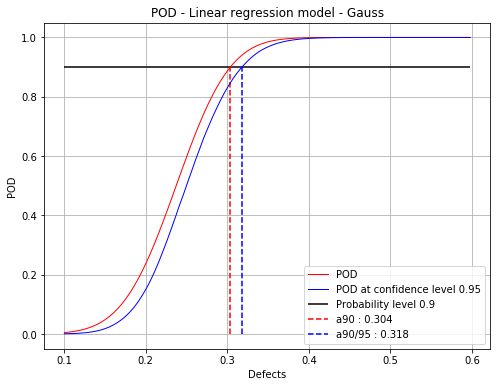

In [9]:
fig, ax = PODGauss.drawPOD(probabilityLevel=0.9, confidenceLevel=0.95,
                      name='figure/PODGaussCensored.png')
# The figure is saved in PODGauss.png
fig.show()

## Build POD only with the filtered data

A static method is used to get the defects and signals only in the
uncensored area.

In [10]:
print(otpod.DataHandling.filterCensoredData.__doc__)


        Sort inputSample and signals with respect to the censore thresholds.

        Parameters
        ----------
        inputSample : 2-d sequence of float
            Vector of the input sample.
        signals : 2-d sequence of float
            Vector of the signals, of dimension 1.
        noiseThres : float
            Value for low censored data. Default is None.
        saturationThres : float
            Value for high censored data. Default is None

        Returns
        -------
        inputSampleUnc : 2-d sequence of float
            Vector of the input sample in the uncensored area.
        inputSampleNoise : 2-d sequence of float
            Vector of the input sample in the noisy area.
        inputSampleSat : 2-d sequence of float
            Vector of the input sample in the saturation area.
        signalsUnc : 2-d sequence of float
            Vector of the signals in the uncensored area.

        Notes
        -----
        The data are sorted in three differ

In [11]:
result = otpod.DataHandling.filterCensoredData(defects, signals,
                                               noiseThres, saturationThres)
defectsFiltered = result[0]
signalsFiltered = result[3]

In [12]:
PODfilteredData = otpod.UnivariateLinearModelPOD(defectsFiltered, signalsFiltered,
                                                 detection,
                                                 resDistFact=ot.NormalFactory(),
                                                 boxCox=True)
PODfilteredData.run()

In [13]:
# Detection size at probability level 0.9
# and confidence level 0.95
print(PODfilteredData.computeDetectionSize(0.9, 0.95))

[a90 : 0.295976, a90/95 : 0.310948]


/calcul/home/dumas/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


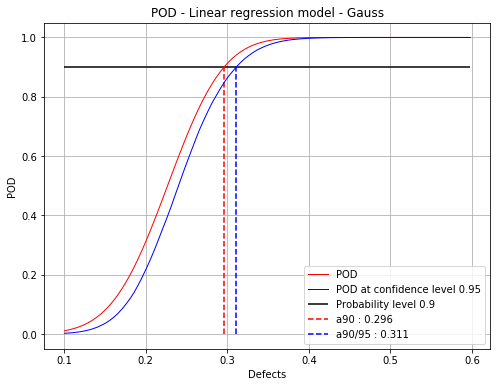

In [14]:
fig, ax = PODfilteredData.drawPOD(probabilityLevel=0.9, confidenceLevel=0.95,
                      name='figure/PODGaussFiltered.png')
# The figure is saved in PODGauss.png
fig.show()